# Thermo HW5 P-1: VDW EOS

Author: YeNguyenEdalgo

**Descritption**: 
    * System of liquid and vapor carbondioxide 
    * Assuming VDW fluids
    * Calculate VDW EOS constants 
    * Solving system of nonlinear equations for V_i, T_f, V_f
    * Construct the spinodal curves to determine limits of stability 

**VDW EOS:** 

\begin{equation}
    P = \frac{RT}{V-b} - \frac{a}{V^2}
\end{equation}

**System of non-linear equations:**

\begin{equation}
{V_i}^3 - \bigg( \frac{RT_i}{P_i} + b \bigg) {V_i}^2 + \frac{a}{P_i} V_i - \frac{ab}{P_i} = 0
\end{equation}
    
\begin{equation}
{V_f}^3 - \bigg( \frac{RT_f}{P_f} + b \bigg) {V_f}^2 + \frac{a}{P_f} V_f - \frac{ab}{P_f} = 0
\end{equation}

\begin{equation}
T_f - T_i \bigg( \frac{V_f-b}{V_i-b} \bigg)^{c} =0 
\end{equation}

where
\begin{equation}
c = R/(R-C_p)
\end{equation}

**Solving system of non-linear equations**

In [145]:
import scipy.optimize as opt
import numpy as np

"""Solve for V_i and T_f"""

def f(var) :
    (T_f, V_f) = var
    
    R = 83.14                          #cm3 bar mol-1 K-1  
    Tc = 304.21                        #K
    Pc = 73.825                        #bar 

    a = 27/64 * (R*Tc)**2 / Pc         #cm6 bar mol-2
    b = 1/8 * R*Tc / Pc                #cm3 mol-1
    
    T_i = 294                          #K
    P_i = 58.4                         #bar
    P_f = 1                            #bar
    
    Cp = 36.71                         #J mol-1 K-1
    R_j = 8.314                        #J mol-1 K-1
    c = R_j / (R_j*-Cp)

    first_eq = np.poly1d([1, - (R*T_i/P_i + b), a/P_i, - a*b/P_i])
    roots = first_eq.r    
    #print(roots)
    
    V_i = np.real(roots[0])
    
    second_eq = V_f**3 - (R*T_f/P_f + b) * V_f**2 + a/P_f * V_f - a*b/P_f
    third_eq = T_f - T_i * ((V_f-b) / (V_i-b))**(c) 
    return [second_eq, third_eq]

sol = opt.fsolve(f, (306,500))
#print(sol)

/Users/yennguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars
/Users/yennguyen/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [146]:
"""Parameters"""

R = 83.14                          #cm3 bar mol-1 K-1  
Tc = 304.21                        #K
Pc = 73.825                        #bar 

a = 27/64 * (R*Tc)**2 / Pc         #cm6 bar mol-2
b = 1/8 * R*Tc / Pc                #cm3 mol-1

T_i = 294                          #K
P_i = 58.4                         #bar
P_f = 1                            #bar

"""Solve for V_f"""

first_eq = np.poly1d([1, - (R*T_i/P_i + b), a/P_i, - a*b/P_i])
roots_eq1 = np.real(first_eq.r)  
V_i = format(roots_eq1[0],'f')

T_f = sol[0]
second_eq = np.poly1d([1, - (R*T_f/P_f + b), a/P_f, - a*b/P_f])
roots_eq2 = np.real(second_eq.r)  
V_f = format(roots_eq2[0],'f')

print("a = " +str(format(a,'e') +" cm6 bar mol-2"),
      "b = " +str(format(b, 'e')) +" cm3 mol-1",   
      sep="\n") 

print("V_i = " +str(V_i) +" cm3 mol-1")
print("T_f = " +str(sol[0]) +" K",
      "V_f = " +str(V_f) +" cm3 mol-1",
      sep="\n")

a = 3.655505e+06 cm6 bar mol-2
b = 4.282428e+01 cm3 mol-1
V_i = 260.729672 cm3 mol-1
T_f = 306.12550039035716 K
V_f = 25350.141417 cm3 mol-1


**Plotting P-V plane:**

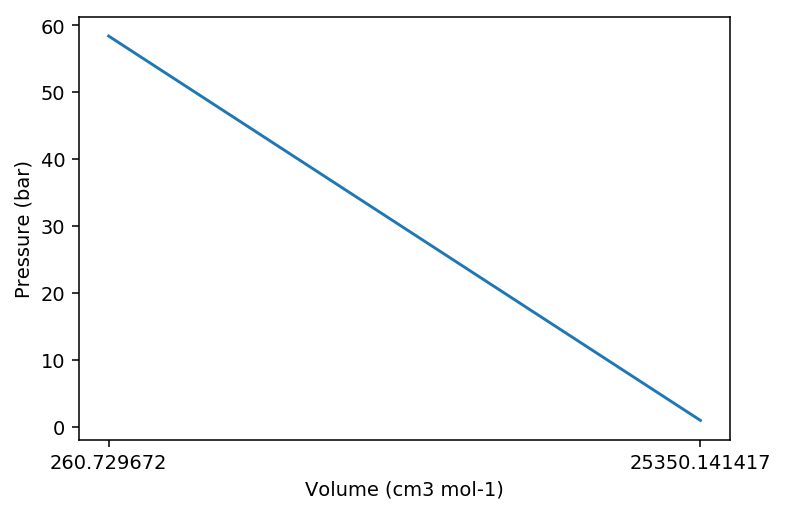

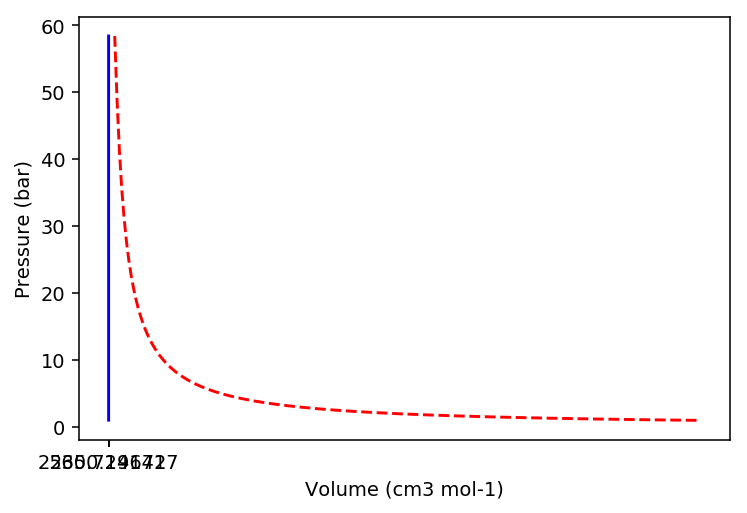

In [151]:
from matplotlib import pyplot as plt

traj_V = np.array([V_i, V_f])
traj_p = np.array([P_i, P_f])

V = np.arange(float(V_i), float(V_f), 100)
T = np.linspace(294, 310, 10)
spinodal_curve = np.array(R*T_i / (V-b) - a / V**2)

plt.figure(figsize=None, dpi=140);
plt.plot(traj_V, traj_p)
plt.ylabel('Pressure (bar)');
plt.xlabel('Volume (cm3 mol-1)');

plt.figure(figsize=None, dpi=140);
plt.plot(traj_V, traj_p, 'b', V, spinodal_curve, 'r--');
plt.ylabel('Pressure (bar)');
plt.xlabel('Volume (cm3 mol-1)');